# Analysis of Shh target genes when the Shh pathway is conditionally activated in astrocytes.
## Line profiles were taken from immuno images of Kir4.1, Glast, GlyT, and GAT3 using the associated imagej scripts

## Libraries

In [1]:
from profiles import profiles
from profiles.profiles import trace_per_animal_by_geno, plot_datapoints, grouped_ttests
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## File Locations and image scale


In [2]:
animal_file = "../data/CA1_M2_20191028/animal_meta.csv"
animal_meta = pd.read_csv(animal_file)
animal_meta['animal'] = animal_meta['animal'].astype(str)
data_path = "../data/CA1_M2_20191028/"
# add image scale
# add regions
zero = 0
subregions = {'SPy': np.r_[zero - 50:zero + 50],
           'periSPy': np.r_[zero - 150:zero - 50, zero + 50:zero + 150],
              'SO': np.r_[-400:-150],
              'SR': np.r_[100:500]
           }

## The cohort:

In [3]:
print(animal_meta.loc[:, ('animal', 'geno', 'sex')])

   animal   geno     sex
0   14836  SmoM2  female
1   14837  SmoM2  female
2  15090B    Tom    male
3   15086    Tom    male
4   15089    Tom    male
5  15090A    Tom    male


## run data parsing over whole folder to generate the dataset object

In [4]:
M2 = profiles.parse_data_folder(data_path, animal_meta)
# populate metadata slot on dataset object
M2.create_meta()
M2.meta.head()

,name,image,animal,geno,stain,region
0,None,14836_GLAST_TOM_KIR_CA1_0016.oif,14836,SmoM2,GLAST,CA1
1,None,14836_GLAST_TOM_KIR_CA1_0016.oif,14836,SmoM2,GLAST,CA1
2,None,14836_GLAST_TOM_KIR_CA1_0016.oif,14836,SmoM2,GLAST,CA1
3,None,14836_GLAST_TOM_KIR_CA1_0016.oif,14836,SmoM2,GLAST,CA1
4,None,14836_GLAST_TOM_KIR_CA1_0016.oif,14836,SmoM2,GLAST,CA1


In [5]:
M2.meta.groupby(["geno"]).nunique()

,name,image,animal,geno,stain,region
geno,,,,,,
SmoM2,0,24,2,1,5,1
Tom,0,48,4,1,5,1


## Generate a long dataframe of the dataset suitable for line plots

In [6]:
M2.data = M2.long()

/Users/wtf/.conda/envs/immuno_profile/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## plot heatmaps

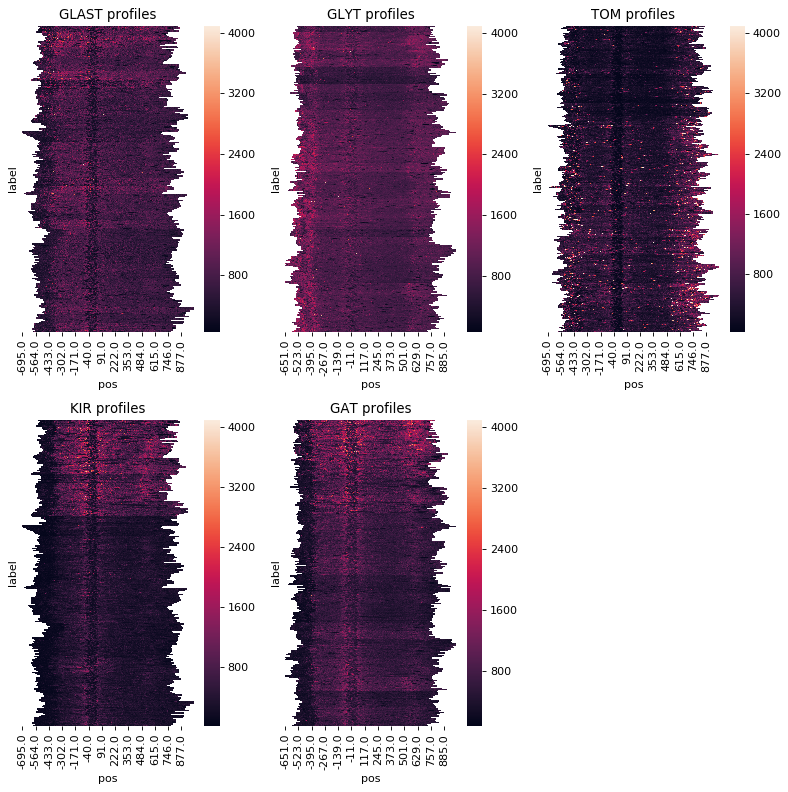

In [7]:
# import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

from profiles import profiles


for i, stain in enumerate(M2.meta['stain'].unique(), start=1):
    ax = fig.add_subplot(2,3, i)
    ax = profiles.plot_heatmap(M2.data, stain)
    i=i+1
fig.tight_layout()

## Plot line per animal

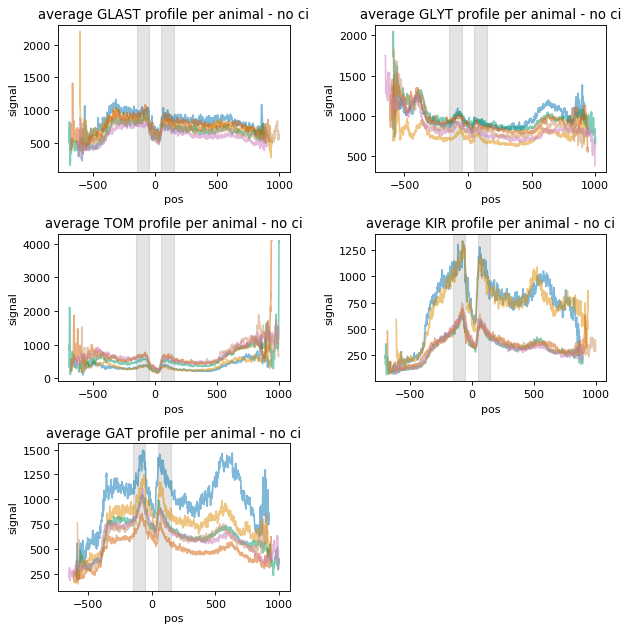

In [8]:
fig = plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

for i, stain in enumerate(M2.meta['stain'].unique(), start=1):
    ax = fig.add_subplot(3,2, i)
    ax = profiles.trace_per_animal(M2.data, stain)
    ax.get_legend().remove()
fig.tight_layout()
plt.show()

## Plot line per geno - collapsed at animal level  
## n = number of animals per geno

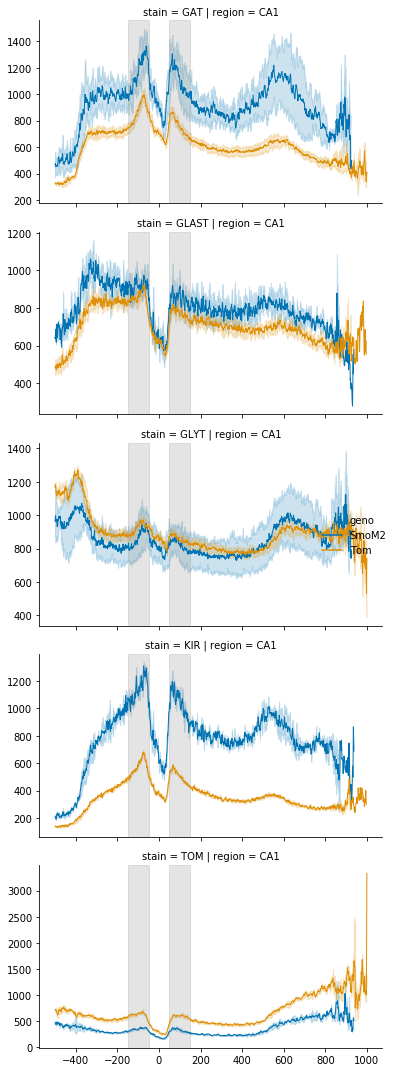

In [9]:
fig = trace_per_animal_by_geno(M2.data)

In [10]:
fig.savefig("../figures/M2_geno_trace002.pdf")

## Bar plots of mean signal per region
## n = number of animals per geon

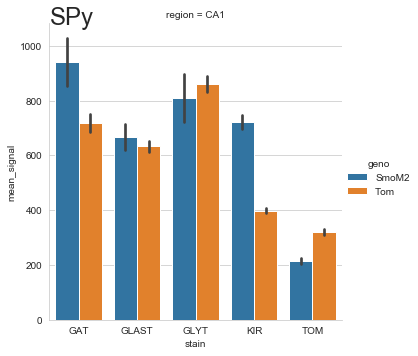

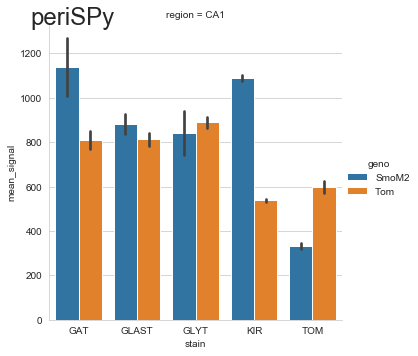

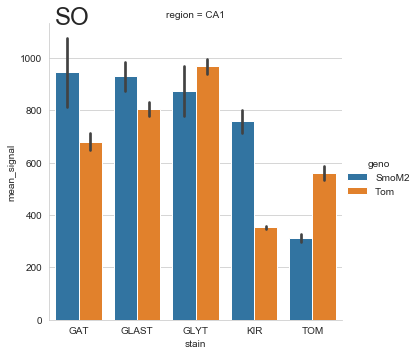

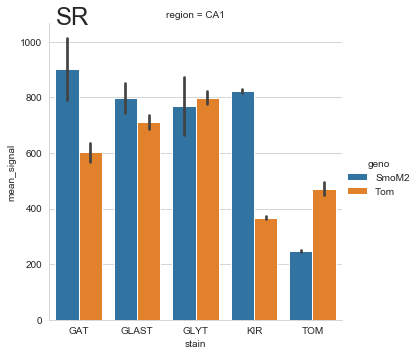

In [11]:
plot_datapoints(M2.data, subregions, style = "bar", save_prefix = "../figures/M2_bar_")

## T-tests comparing genos in each region, subregion for each stain

In [16]:
t_tests = grouped_ttests(M2.data, subregions)

In [17]:
t_tests.to_csv("M2_t_tests.csv")

In [ ]:
# write function to output data in a easy way to manipulate later.